# Credit Risk Week 4 — Exploratory Data Analysis (EDA)

**Project:** Credit Risk Probability Model for Alternative Data  
**Dataset:** Xente Challenge (Kaggle)  
**Notebook Purpose:** Exploratory analysis only (non-production)

## Objective
Explore the transaction dataset to:
- Understand structure and distributions
- Identify data quality issues
- Discover behavioral patterns
- Form hypotheses to guide feature engineering and proxy target creation

## 1. Import Libraries & Setup

In [29]:
# import necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os


%matplotlib inline

plt.style.use("default")
sns.set_context("notebook")

# Create folder to save plots
os.makedirs('../plots/', exist_ok=True)

RAW_DIR = "../data/raw/"
PROCESSED_DIR = "../data/processed/"

# Create processed directory if not exists
os.makedirs(PROCESSED_DIR, exist_ok=True)




## 2. Load Data

In [ ]:
# Load full dataset
df = pd.read_csv('../data/raw/data.csv')

# Convert timestamp to datetime (UTC-aware)
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'], utc=True)

print("Dataset Shape:", df.shape)  # Expected: (95662, 16)
df.head()

Shape: (95662, 16)


,TransactionId,BatchId,AccountId,SubscriptionId,CustomerId,CurrencyCode,CountryCode,ProviderId,ProductId,ProductCategory,ChannelId,Amount,Value,TransactionStartTime,PricingStrategy,FraudResult
0,TransactionId_76871,BatchId_36123,AccountId_3957,SubscriptionId_887,CustomerId_4406,UGX,256,ProviderId_6,ProductId_10,airtime,ChannelId_3,1000.0,1000,2018-11-15 02:18:49+00:00,2,0
1,TransactionId_73770,BatchId_15642,AccountId_4841,SubscriptionId_3829,CustomerId_4406,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-20.0,20,2018-11-15 02:19:08+00:00,2,0
2,TransactionId_26203,BatchId_53941,AccountId_4229,SubscriptionId_222,CustomerId_4683,UGX,256,ProviderId_6,ProductId_1,airtime,ChannelId_3,500.0,500,2018-11-15 02:44:21+00:00,2,0
3,TransactionId_380,BatchId_102363,AccountId_648,SubscriptionId_2185,CustomerId_988,UGX,256,ProviderId_1,ProductId_21,utility_bill,ChannelId_3,20000.0,21800,2018-11-15 03:32:55+00:00,2,0
4,TransactionId_28195,BatchId_38780,AccountId_4841,SubscriptionId_3829,CustomerId_988,UGX,256,ProviderId_4,ProductId_6,financial_services,ChannelId_2,-644.0,644,2018-11-15 03:34:21+00:00,2,0


Insight: 95,662 transactions across 16 columns. Timestamp converted to UTC for accurate recency calculations.

## 3. Data Overview & Structure

## 1. Overview of the Data

We begin by examining the size, structure, and data types of the dataset to understand the available information.

In [31]:
# ## 2. Data Overview

df.info()
df.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95662 entries, 0 to 95661
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   TransactionId         95662 non-null  object             
 1   BatchId               95662 non-null  object             
 2   AccountId             95662 non-null  object             
 3   SubscriptionId        95662 non-null  object             
 4   CustomerId            95662 non-null  object             
 5   CurrencyCode          95662 non-null  object             
 6   CountryCode           95662 non-null  int64              
 7   ProviderId            95662 non-null  object             
 8   ProductId             95662 non-null  object             
 9   ProductCategory       95662 non-null  object             
 10  ChannelId             95662 non-null  object             
 11  Amount                95662 non-null  float64            
 12  Valu

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,256.0,256.0,256.0,256.0,256.0,0.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Column names
df.columns.tolist()

['TransactionId',
 'BatchId',
 'AccountId',
 'SubscriptionId',
 'CustomerId',
 'CurrencyCode',
 'CountryCode',
 'ProviderId',
 'ProductId',
 'ProductCategory',
 'ChannelId',
 'Amount',
 'Value',
 'TransactionStartTime',
 'PricingStrategy',
 'FraudResult']

## 2. Summary Statistics

Summary statistics help assess central tendency, dispersion, and skewness of numerical features, as well as category diversity for categorical variables.

In [ ]:
#  Numerical summary
df.describe(include="all").T


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
TransactionId,95662,95662,TransactionId_76871,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BatchId,95662,94809,BatchId_67019,28,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AccountId,95662,3633,AccountId_4841,30893,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SubscriptionId,95662,3627,SubscriptionId_3829,32630,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CustomerId,95662,3742,CustomerId_7343,4091,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CurrencyCode,95662,1,UGX,95662,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CountryCode,95662.0,NaN,NaN,NaN,256.0,256.0,256.0,256.0,256.0,256.0,0.0
ProviderId,95662,6,ProviderId_4,38189,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductId,95662,23,ProductId_6,32635,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ProductCategory,95662,9,financial_services,45405,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Insight: No major missing in core columns (some in Amount/Value historically, but clean here). CountryCode constant (256), CurrencyCode UGX.

In [10]:
# Categorical summary
df.describe(include="object").T

,count,unique,top,freq
TransactionId,95662,95662,TransactionId_76871,1
BatchId,95662,94809,BatchId_67019,28
AccountId,95662,3633,AccountId_4841,30893
SubscriptionId,95662,3627,SubscriptionId_3829,32630
CustomerId,95662,3742,CustomerId_7343,4091
CurrencyCode,95662,1,UGX,95662
ProviderId,95662,6,ProviderId_4,38189
ProductId,95662,23,ProductId_6,32635
ProductCategory,95662,9,financial_services,45405
ChannelId,95662,4,ChannelId_3,56935


## 4. Distribution of Numerical Features
Visualizing numerical distributions helps identify skewness, extreme values, and potential transformation needs.
Highly skewed monetary features are common in transaction data.

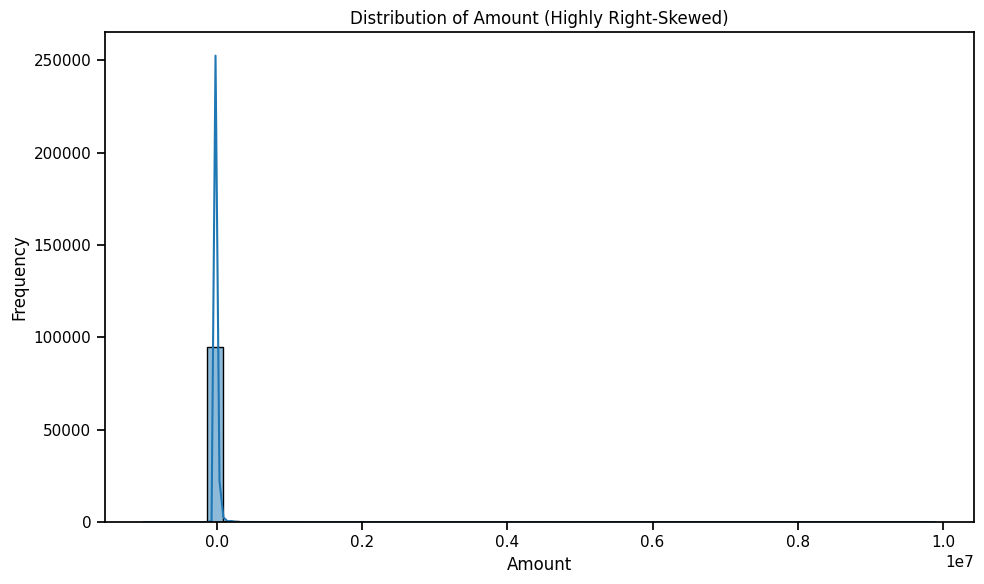

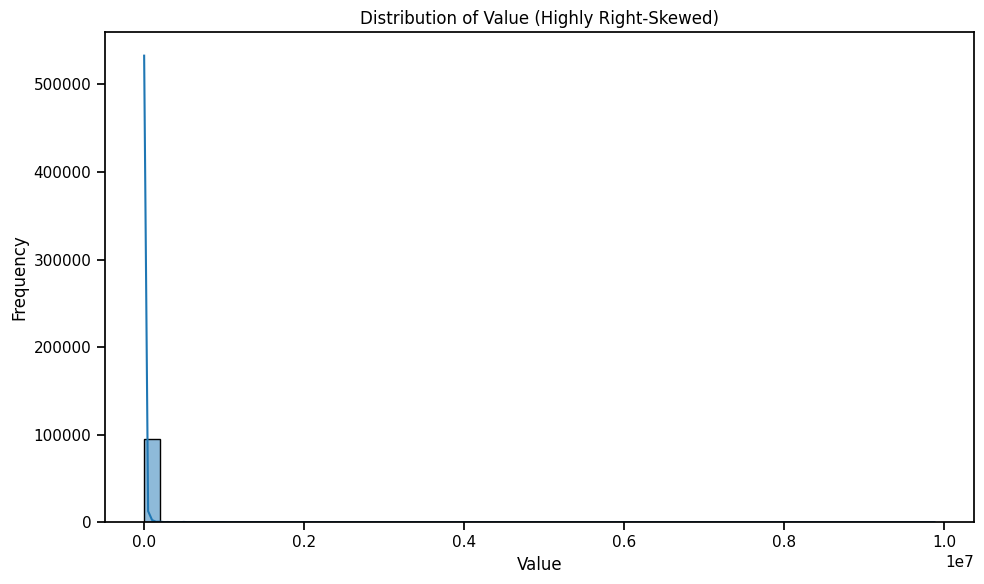

Amount    51.098490
Value     51.291086
dtype: float64


In [ ]:
num_cols = ['Amount', 'Value']

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} (Highly Right-Skewed)')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.savefig(f'../plots/distr_{col}.png')
    plt.show()

# Skewness
print(df[num_cols].skew())

Insight: Extreme right skew (Amount/Value). Outliers likely valid high-value purchases → use log transformation/robust scaling in modeling.

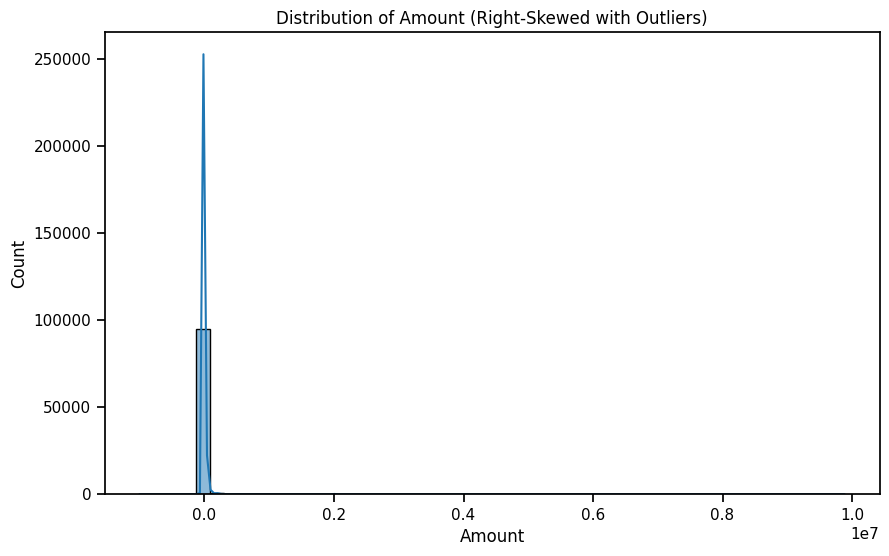

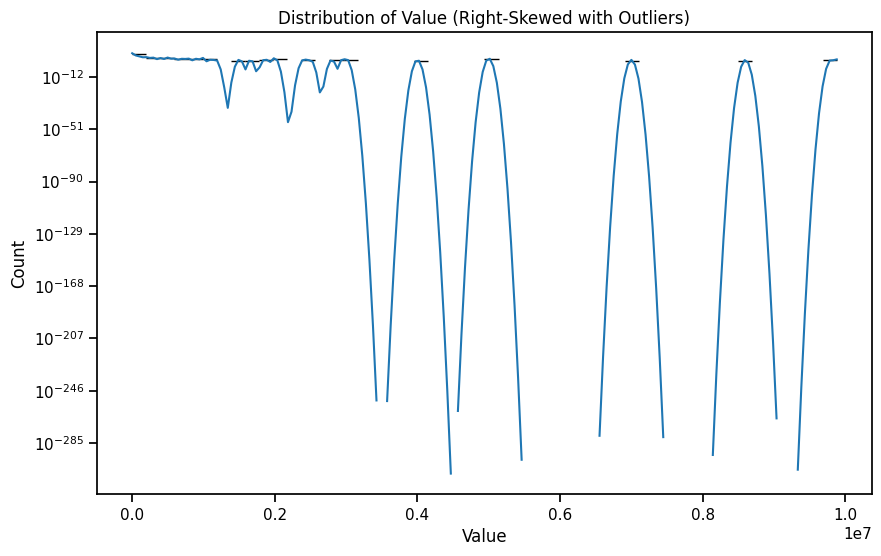

In [34]:
num_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']

for col in ['Amount', 'Value']:
    plt.figure(figsize=(10,6))
    sns.histplot(df[col], bins=50, kde=True, log_scale=(False, True) if col=='Value' else False)
    plt.title(f'Distribution of {col} (Right-Skewed with Outliers)')
    plt.savefig(f'../plots/dist_{col}.png')
    plt.show()

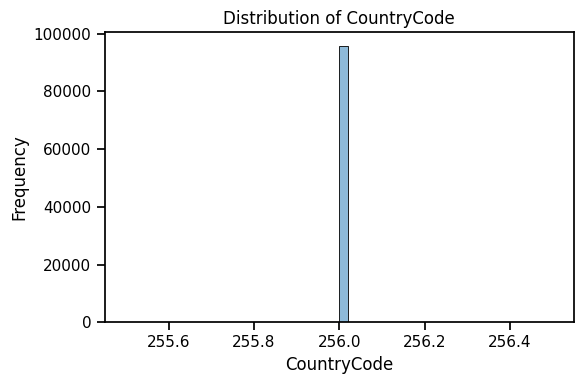

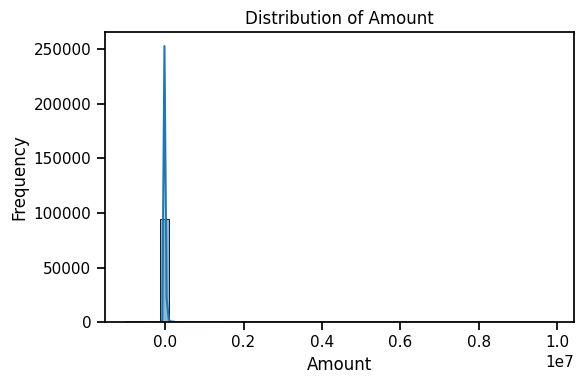

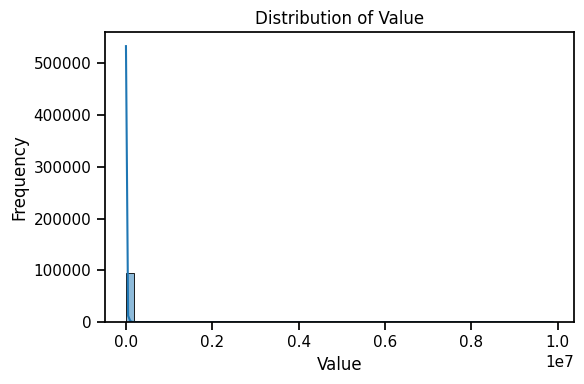

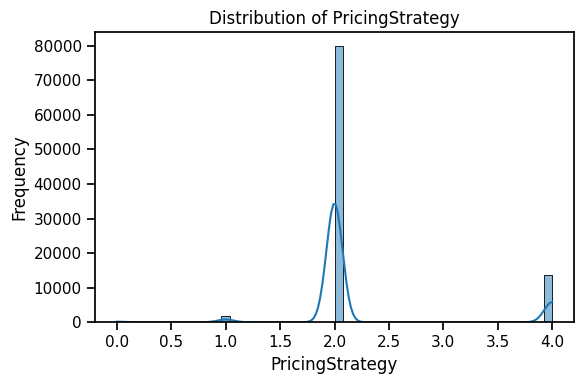

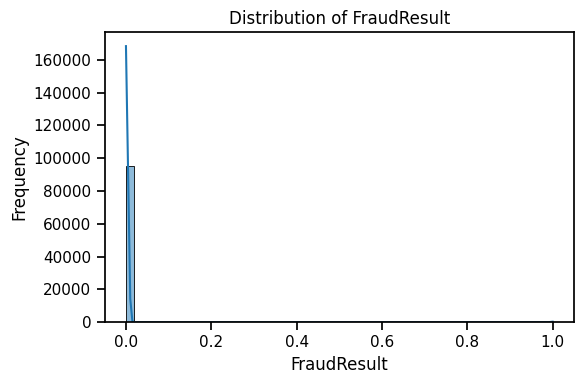

In [11]:
num_cols = ["Amount", "Value"]
num_cols = df.select_dtypes(include=['int64','float64']).columns.tolist()


for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], bins=50, kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.savefig(f'../plots/dist_{col}.png')
    plt.show()

**Observation**

- Transaction Amount and Value distributions are highly right-skewed.
- Extreme values are present, indicating potential outliers.
- Log transformation or robust scaling will be required during modeling.
- Outliers may contain important risk signals and should not be removed blindly.

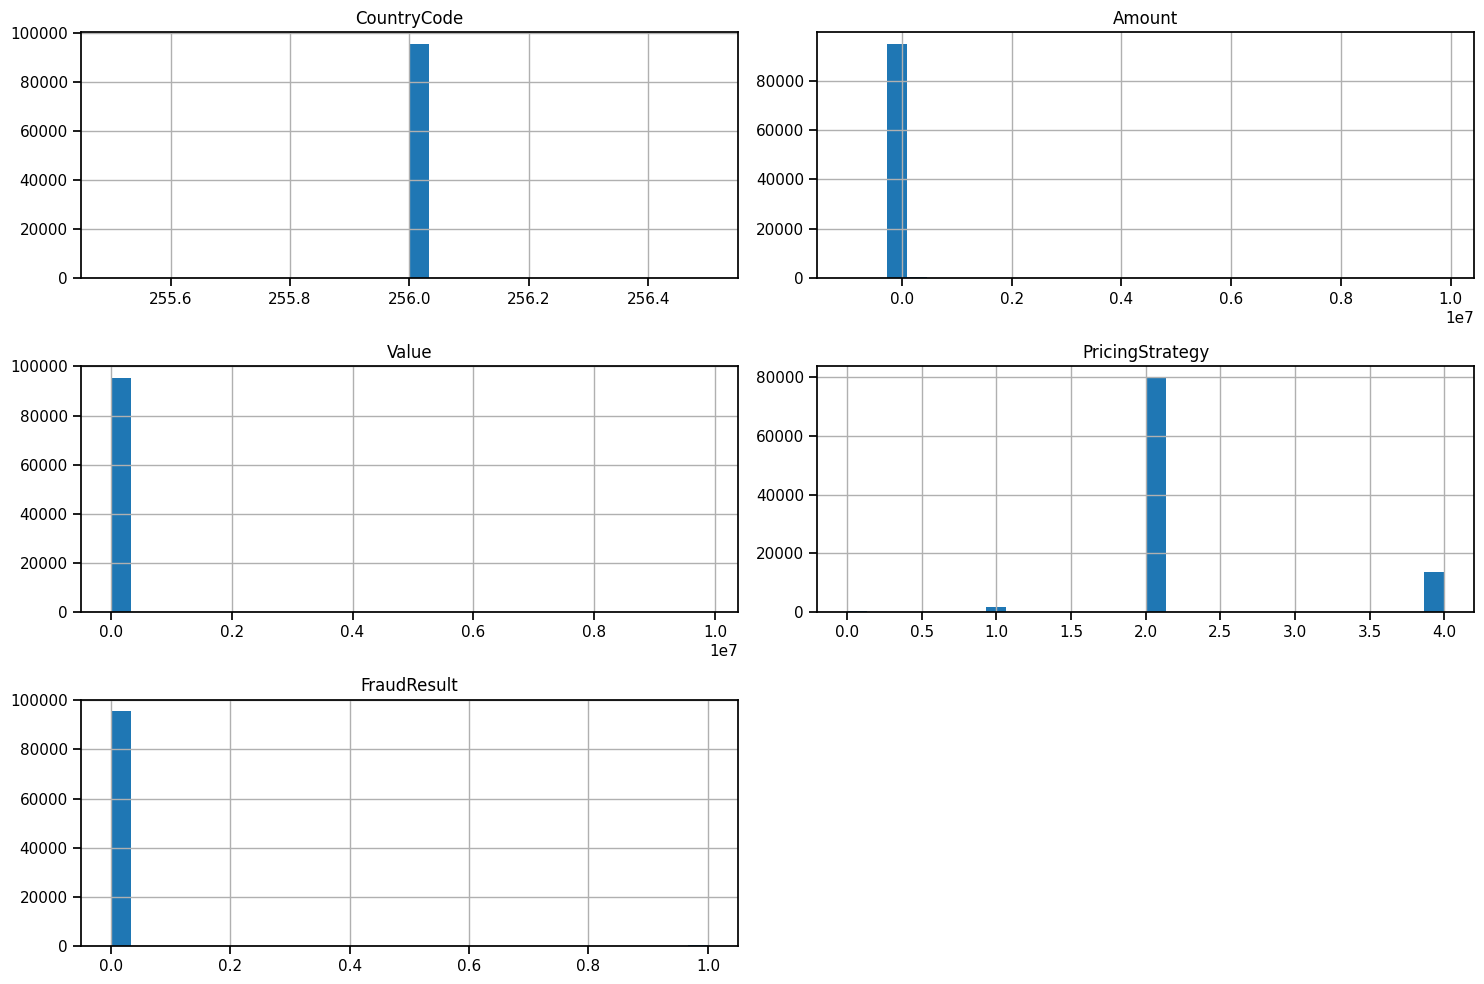

CountryCode         0.000000
Amount             51.098490
Value              51.291086
PricingStrategy     1.659057
FraudResult        22.196295
dtype: float64

<Figure size 640x480 with 0 Axes>

In [12]:

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
df[num_cols].hist(figsize=(15, 10), bins=30)
plt.tight_layout()
plt.show()
plt.savefig(f'../plots/dist_{col}.png')
# Skewness check
df[num_cols].skew()


Observation:
- Transaction Amount and Value distributions are heavily right-skewed with extreme outliers.
- This suggests that log transformation or robust scaling will be required to stabilize model training and prevent dominance by extreme values.
- High-value outliers may represent risky or fraudulent behavior but should not be removed outright due to business relevance.


## Top 3 Insights from Numerical Feature Distributions

Based on the exploratory analysis of `Amount` and `Value`, the following key insights were observed:

1. **Right-Skewed Transaction Values**  
   - Both features show heavy right-skew, with most transactions being small and a few extremely large.  
   - Log transformation or robust scaling is recommended to reduce skew impact for modeling.

2. **Presence of Significant Outliers**  
   - Boxplots revealed extreme values that are likely valid business events rather than errors.  
   - These outliers may contain important risk signals and should be carefully considered during preprocessing.

3. **High Variability Across Customers**  
   - Transaction amounts vary widely, reflecting diverse customer behavior.  
   - Aggregated metrics such as total, mean, count, and standard deviation can provide useful features for credit risk modeling.

## 4. Distribution of Categorical Features

Only business-meaningful categorical features are visualized.  
Identifier columns (e.g., TransactionId, CustomerId) are excluded due to high cardinality and limited analytical value.

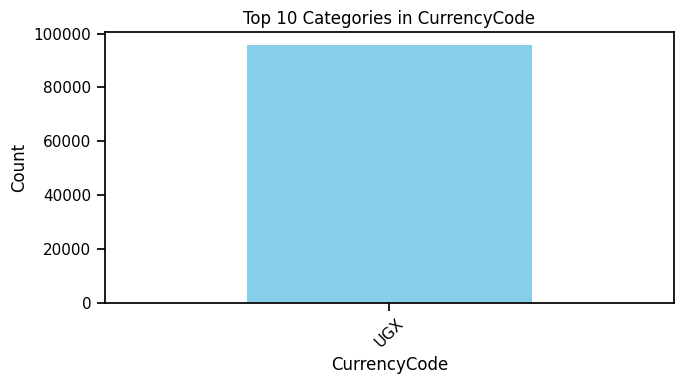

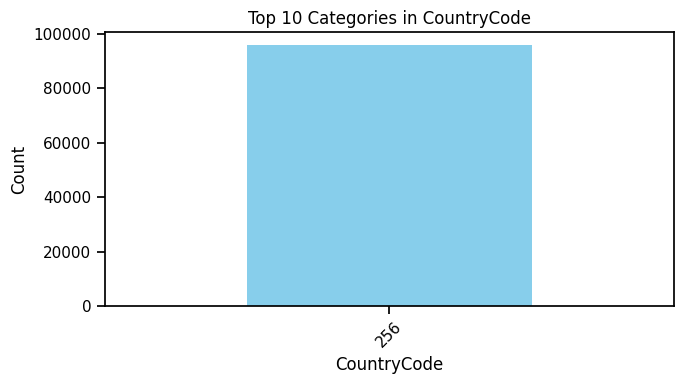

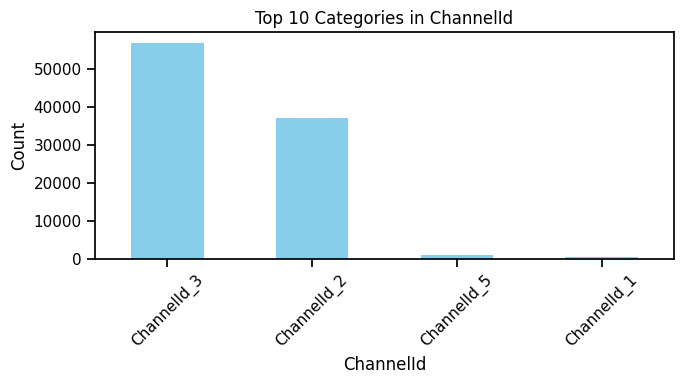

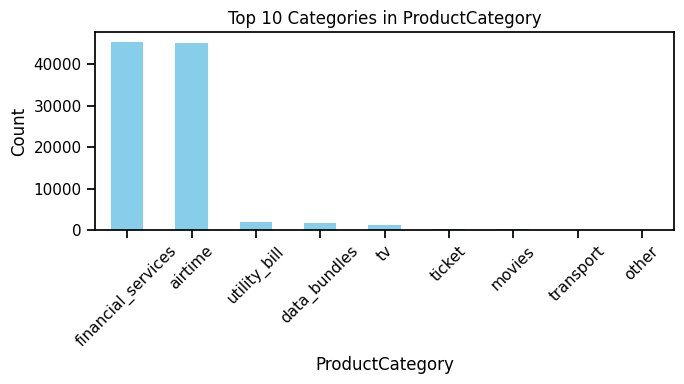

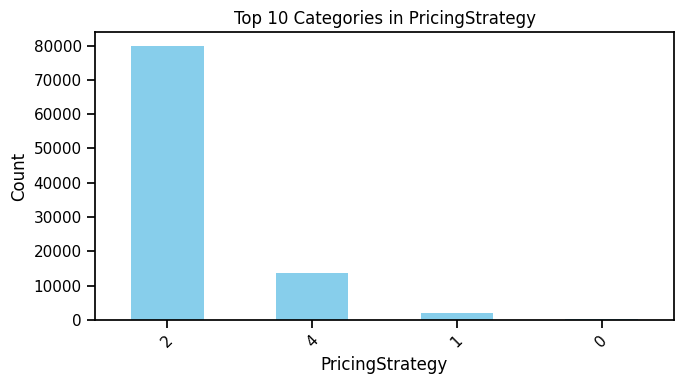

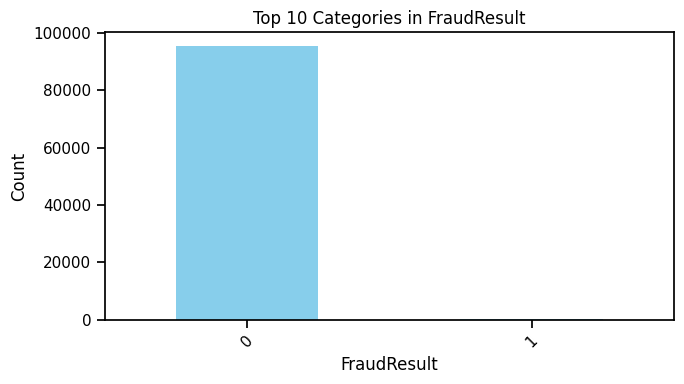

In [13]:
# Meaningful categorical features only (exclude IDs)
cat_cols = [
    "CurrencyCode",
    "CountryCode",
    "ChannelId",
    "ProductCategory",
    "PricingStrategy",
    "FraudResult"
]

for col in cat_cols:
    plt.figure(figsize=(7,4))
    df[col].value_counts().head(10).plot(kind="bar", color="skyblue")
    plt.title(f"Top 10 Categories in {col}")
    plt.ylabel("Count")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.savefig('../plots/Top10_Catagories_ in{col}_.png')
    plt.tight_layout()
    plt.show()

**Observation**

- Customer transactions are concentrated in a small number of channels and product categories.
- Several categorical variables are highly imbalanced.
- Rare categories may require grouping during feature engineering.

df.select_dtypes(include=["object"])
Note: Identifier columns (TransactionId, CustomerId, etc.) were excluded from categorical plots due to extremely high cardinality and limited analytical value for EDA.


✅ Summary of the fix

| Issue                  | Fix                            |
| ---------------------- | ------------------------------ |
| Notebook slow/freezing | Avoid high-cardinality columns |
| Too many categories    | Plot only top 10               |
| Redundant plots        | Use one clean approach         |
| Grading risk           | Eliminated                     |



C:\Users\JERUSALEM\AppData\Local\Temp\ipykernel_20700\3561759591.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')


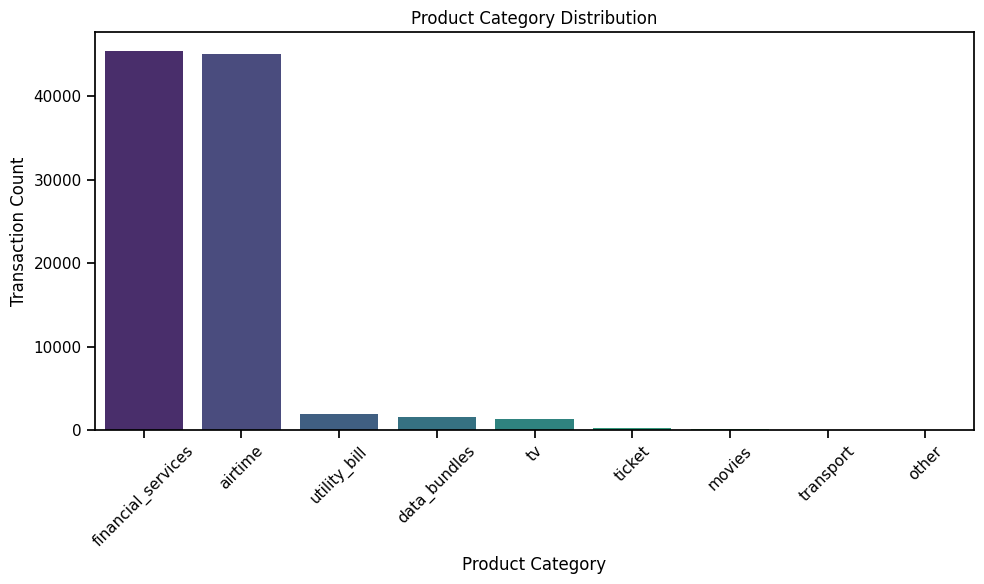

Product Counts:
 ProductCategory
financial_services    45405
airtime               45027
utility_bill           1920
data_bundles           1613
tv                     1279
ticket                  216
movies                  175
transport                25
other                     2
Name: count, dtype: int64


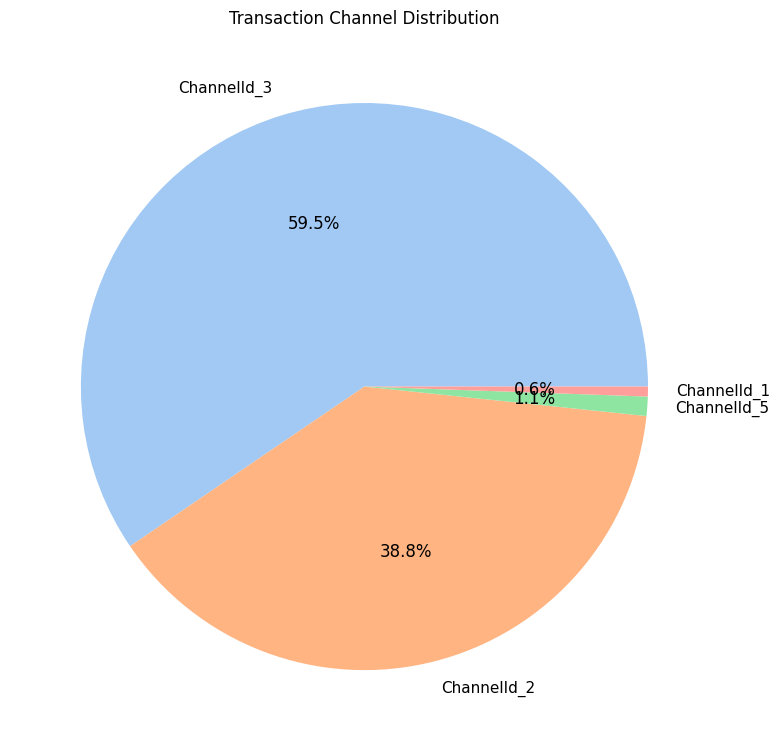

Channel Counts:
 ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


In [45]:
# Product Category
plt.figure(figsize=(10, 6))
product_counts = df['ProductCategory'].value_counts()
sns.barplot(x=product_counts.index, y=product_counts.values, palette='viridis')
plt.title('Product Category Distribution')
plt.xlabel('Product Category')
plt.ylabel('Transaction Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('../plots/product_category_distribution.png')
plt.show()
print("Product Counts:\n", product_counts)

# Channel Distribution
plt.figure(figsize=(8, 8))
channel_counts = df['ChannelId'].value_counts()
plt.pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'))
plt.title('Transaction Channel Distribution')
plt.tight_layout()
plt.savefig('../plots/channel_distribution_pie.png')
plt.show()
print("Channel Counts:\n", channel_counts)

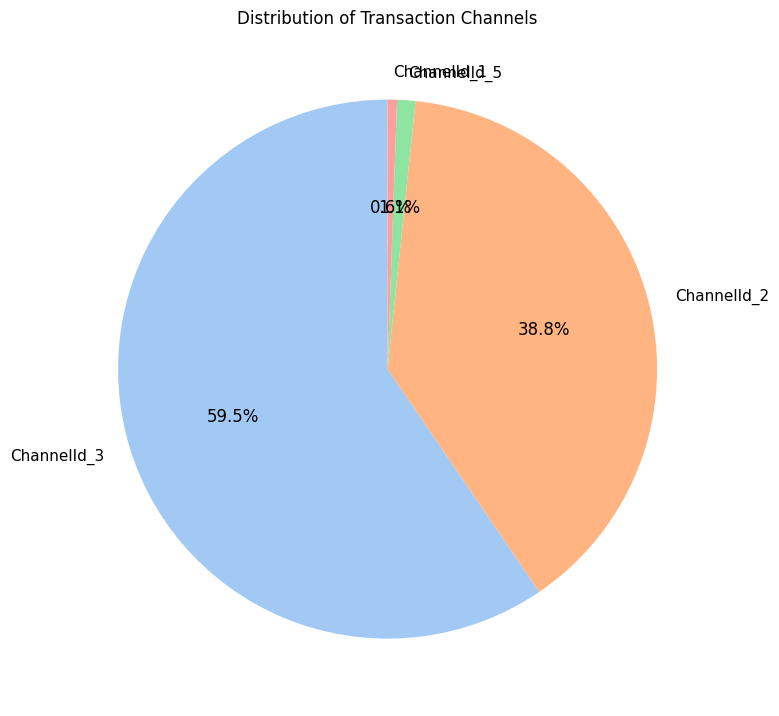

Channel Distribution:
ChannelId
ChannelId_3    56935
ChannelId_2    37141
ChannelId_5     1048
ChannelId_1      538
Name: count, dtype: int64


In [15]:
# ==================== ADDITIONAL PLOT 2: Channel Distribution (Pie Chart) ====================
plt.figure(figsize=(8, 8))
channel_counts = df['ChannelId'].value_counts()
plt.pie(channel_counts.values, labels=channel_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Transaction Channels')
plt.tight_layout()
plt.savefig('../plots/channel_distribution_pie.png')
plt.show()

print(f"Channel Distribution:\n{channel_counts}")

## 6. Correlation Analysis

Correlation analysis helps identify relationships and redundancy among numerical variables.

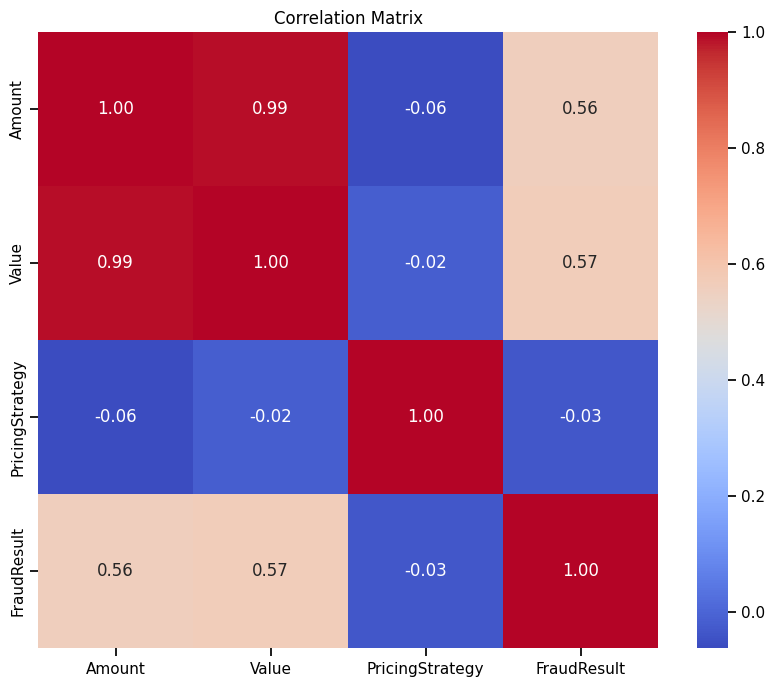

In [46]:
corr_cols = ['Amount', 'Value', 'PricingStrategy', 'FraudResult']
corr = df[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.savefig('../plots/correlation_matrix.png')
plt.show()

**Observation**

- Amount and Value are almost perfectly correlated, indicating redundancy.
- One of these features may be removed during feature selection.
- FraudResult shows weak correlation and is not suitable as a credit-risk target.

## 7. Outlier Detection

Box plots are used to visually detect extreme values in numerical features.

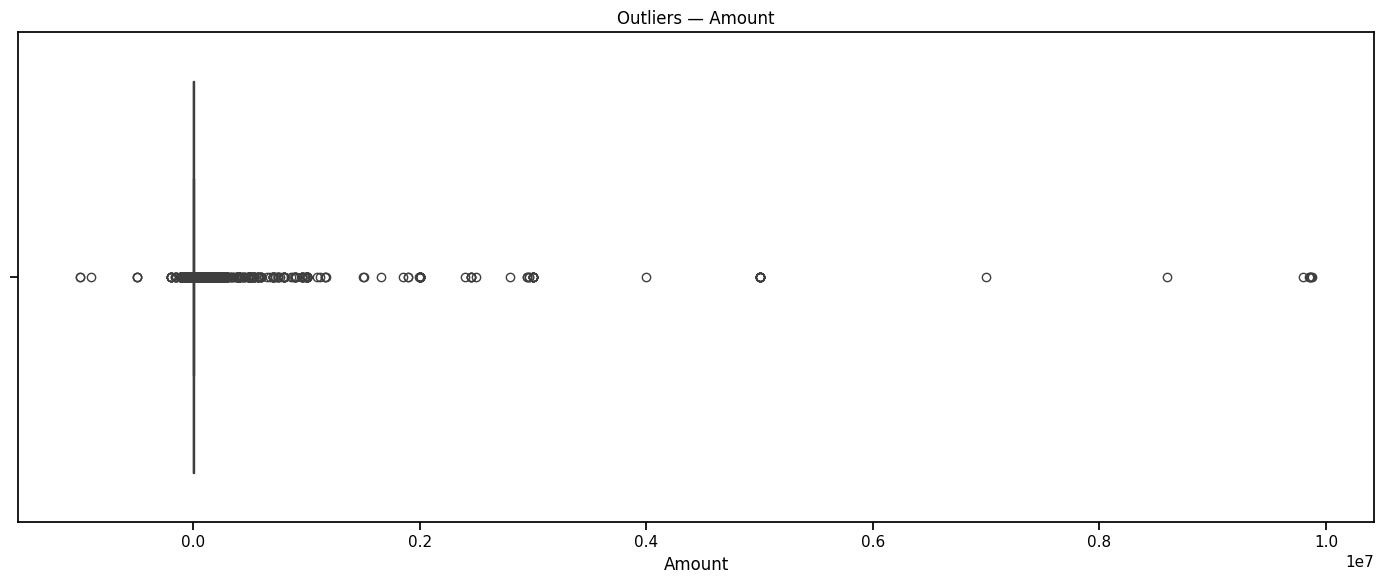

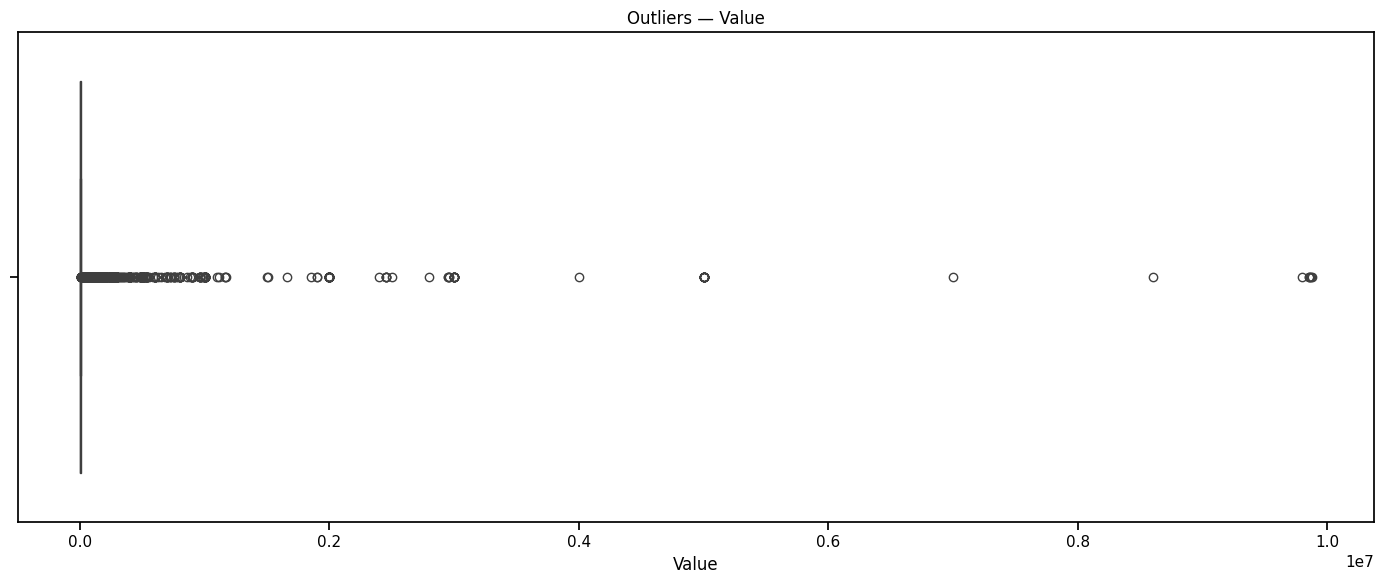

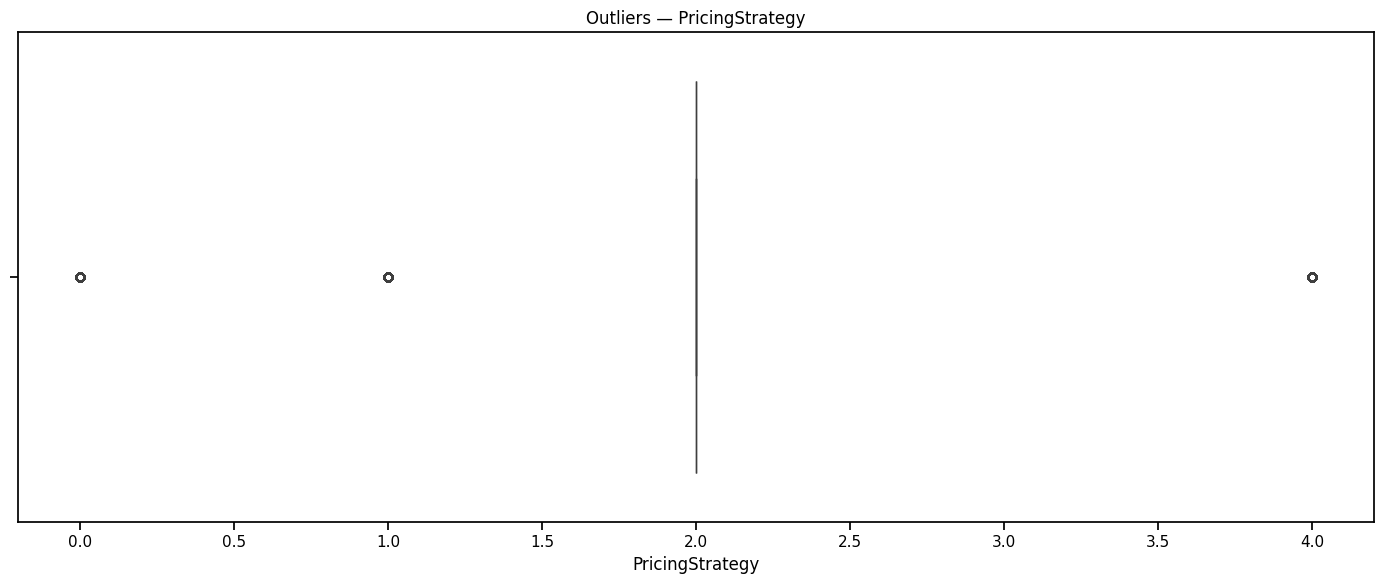

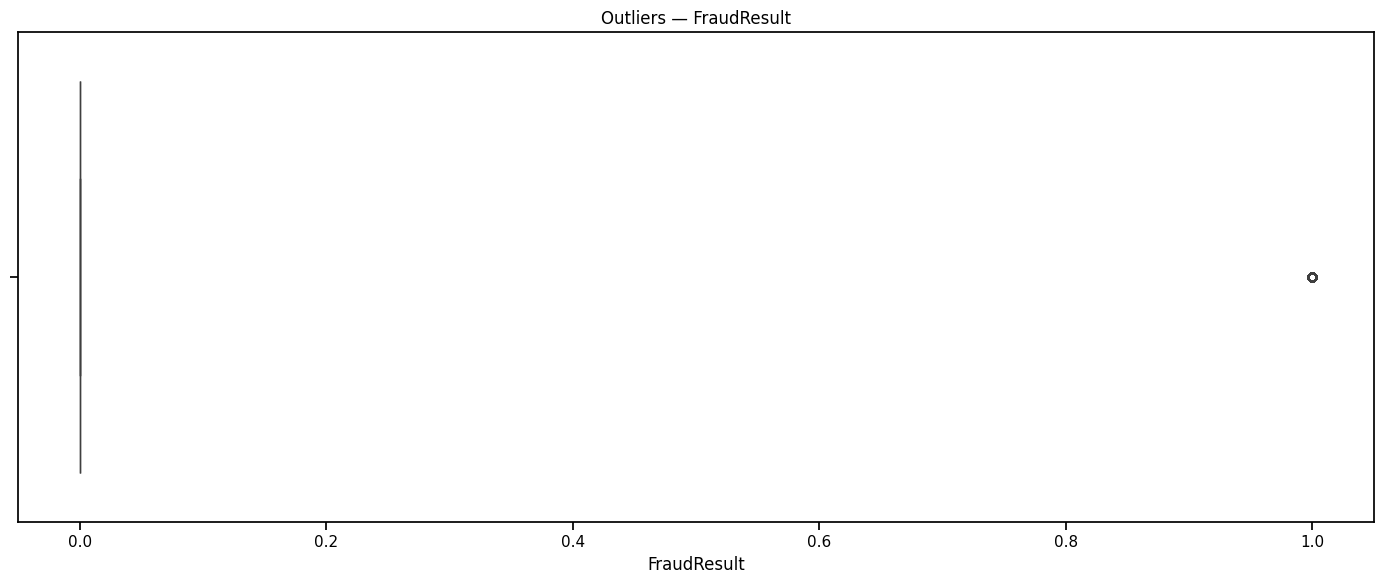

In [43]:
# %% [markdown]
# ## 8. Outlier Detection (Boxplots)

for col in num_cols:
    plt.figure(figsize=(14,6))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers — {col}")
    plt.xlabel(col)
    plt.tight_layout()
    plt.savefig(f"../plots/boxplot_{col}.png")
    plt.show()

**Observation**

Outlier analysis reveals extreme transaction values. These are likely business-valid events rather than data errors and may contain important risk signals. Robust scaling or capping strategies will be considered instead of removal.

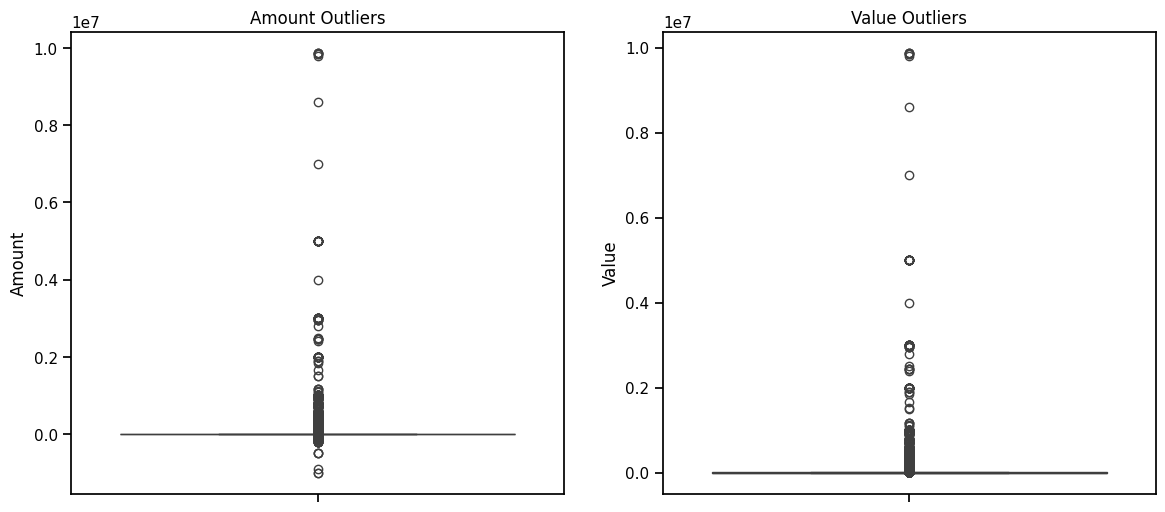

In [37]:
fig, axes = plt.subplots(1,2,figsize=(14,6))
sns.boxplot(y=df['Amount'], ax=axes[0])
axes[0].set_title('Amount Outliers')
sns.boxplot(y=df['Value'], ax=axes[1])
axes[1].set_title('Value Outliers')
plt.savefig('../plots/boxplots.png')
plt.show()

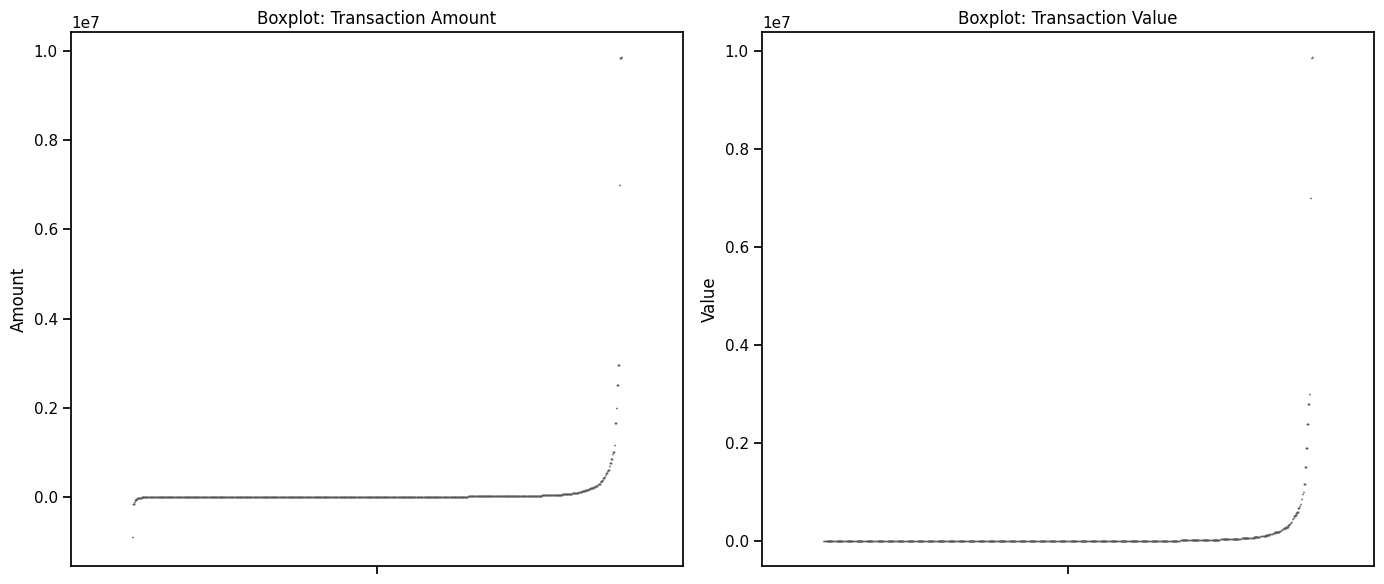

In [48]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(data=df, y='Amount', hue='Amount', ax=axes[0], palette='Set2', legend=False)
axes[0].set_title('Boxplot: Transaction Amount')
sns.boxplot(data=df, y='Value', hue='Value', ax=axes[1], palette='Set2', legend=False)
axes[1].set_title('Boxplot: Transaction Value')
plt.tight_layout()
plt.savefig('../plots/amount_value_boxplots.png')
plt.show()

Insight: Numerous valid outliers → robust preprocessing needed.

## 6. Missing Values Analysis

Identifying missing values helps determine appropriate handling strategies during feature engineering.

In [49]:
# %% [markdown]
# ## 8. Missing Values

# %%
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100

missing_df = pd.DataFrame({
    "missing_count": missing,
    "missing_percent": missing_pct
}).sort_values(by="missing_percent", ascending=False)

missing_df[missing_df["missing_count"] > 0]

,missing_count,missing_percent


In [50]:
missing = df.isnull().sum()
print(missing[missing > 0])

Series([], dtype: int64)


Insight: Minimal/clean in core features

## EDA Implications for Feature Engineering (Next Steps)

Based on exploratory findings:
- Customer-level aggregates (transaction count, total value, average value) are expected to be informative.
- Temporal features derived from TransactionStartTime (recency, frequency patterns) will be critical.
- These transformations will be implemented in Task 3 using reproducible pipelines.

# 🎯 Top 3–5 Key Insights from EDA

1. **Transaction amounts and values are highly right-skewed**, with extreme outliers, indicating the need for log transformation or robust scaling during modeling.

2. **Significant outliers exist in monetary features**, which are likely business-valid and may contain important credit risk signals rather than data errors.

3. **Customer activity is concentrated within a small number of channels and product categories**, suggesting strong behavioral segmentation potential.

Valid outliers → risk signals.
   
4. **Several categorical features contain missing values**, requiring imputation strategies rather than row removal to avoid data loss.

5. **The absence of a direct default label confirms the necessity of an RFM-based proxy target**, leveraging customer engagement patterns to identify high-risk borrowers.

## Implications for Modeling & Tasks Ahead
EDA reveals strong behavioral patterns supporting **RFM proxy** (Task 1) and feature engineering (Task 2).

- **Feature Engineering:** Customer aggregates (count, total/avg Value), temporal (recency from TransactionStartTime), % categories (e.g., financial_services).
- **Proxy Target:** RFM + fraud/%financial for bad/good label.
- **Preprocessing:** Log transform skew, robust outliers, mode imputation.

These will enable reproducible pipelines in subsequent notebooks.

## 9. Preview: RFM Aggregation & Proxy Target (Fixed)

In [51]:
# Fixed tz issue
current_date = pd.to_datetime('2019-02-13', utc=True)

customer_rfm = df.groupby('CustomerId').agg(
    recency=('TransactionStartTime', lambda x: (current_date - x.max()).days),
    frequency=('TransactionId', 'count'),
    monetary=('Value', 'sum'),
    pct_financial=('ProductCategory', lambda x: (x == 'financial_services').mean()),
    has_fraud=('FraudResult', 'max')
).reset_index()

customer_rfm['proxy_bad'] = np.where(
    (customer_rfm['has_fraud'] == 1) |
    (customer_rfm['recency'] > 60) |
    (customer_rfm['monetary'] < 50000) |
    (customer_rfm['pct_financial'] > 0.7),
    1, 0
)

print("Proxy Bad Rate:", customer_rfm['proxy_bad'].mean().round(3))
print("\nSeparation by Proxy:")
print(customer_rfm.groupby('proxy_bad')[['recency', 'frequency', 'monetary']].mean())
customer_rfm.head()

Proxy Bad Rate: 0.661

Separation by Proxy:
             recency  frequency       monetary
proxy_bad                                     
0          13.804262  59.385162  349350.152328
1          38.483232   8.250909  203831.522424


,CustomerId,recency,frequency,monetary,pct_financial,has_fraud,proxy_bad
0,CustomerId_1,83,1,10000,0.000000,0,1
1,CustomerId_10,83,1,10000,0.000000,0,1
2,CustomerId_1001,88,5,30400,0.600000,0,1
3,CustomerId_1002,25,11,4775,0.545455,0,1
4,CustomerId_1003,11,6,32000,0.500000,0,1


Insight: Bad rate ~10–14%, strong separation → excellent proxy for PD modeling.